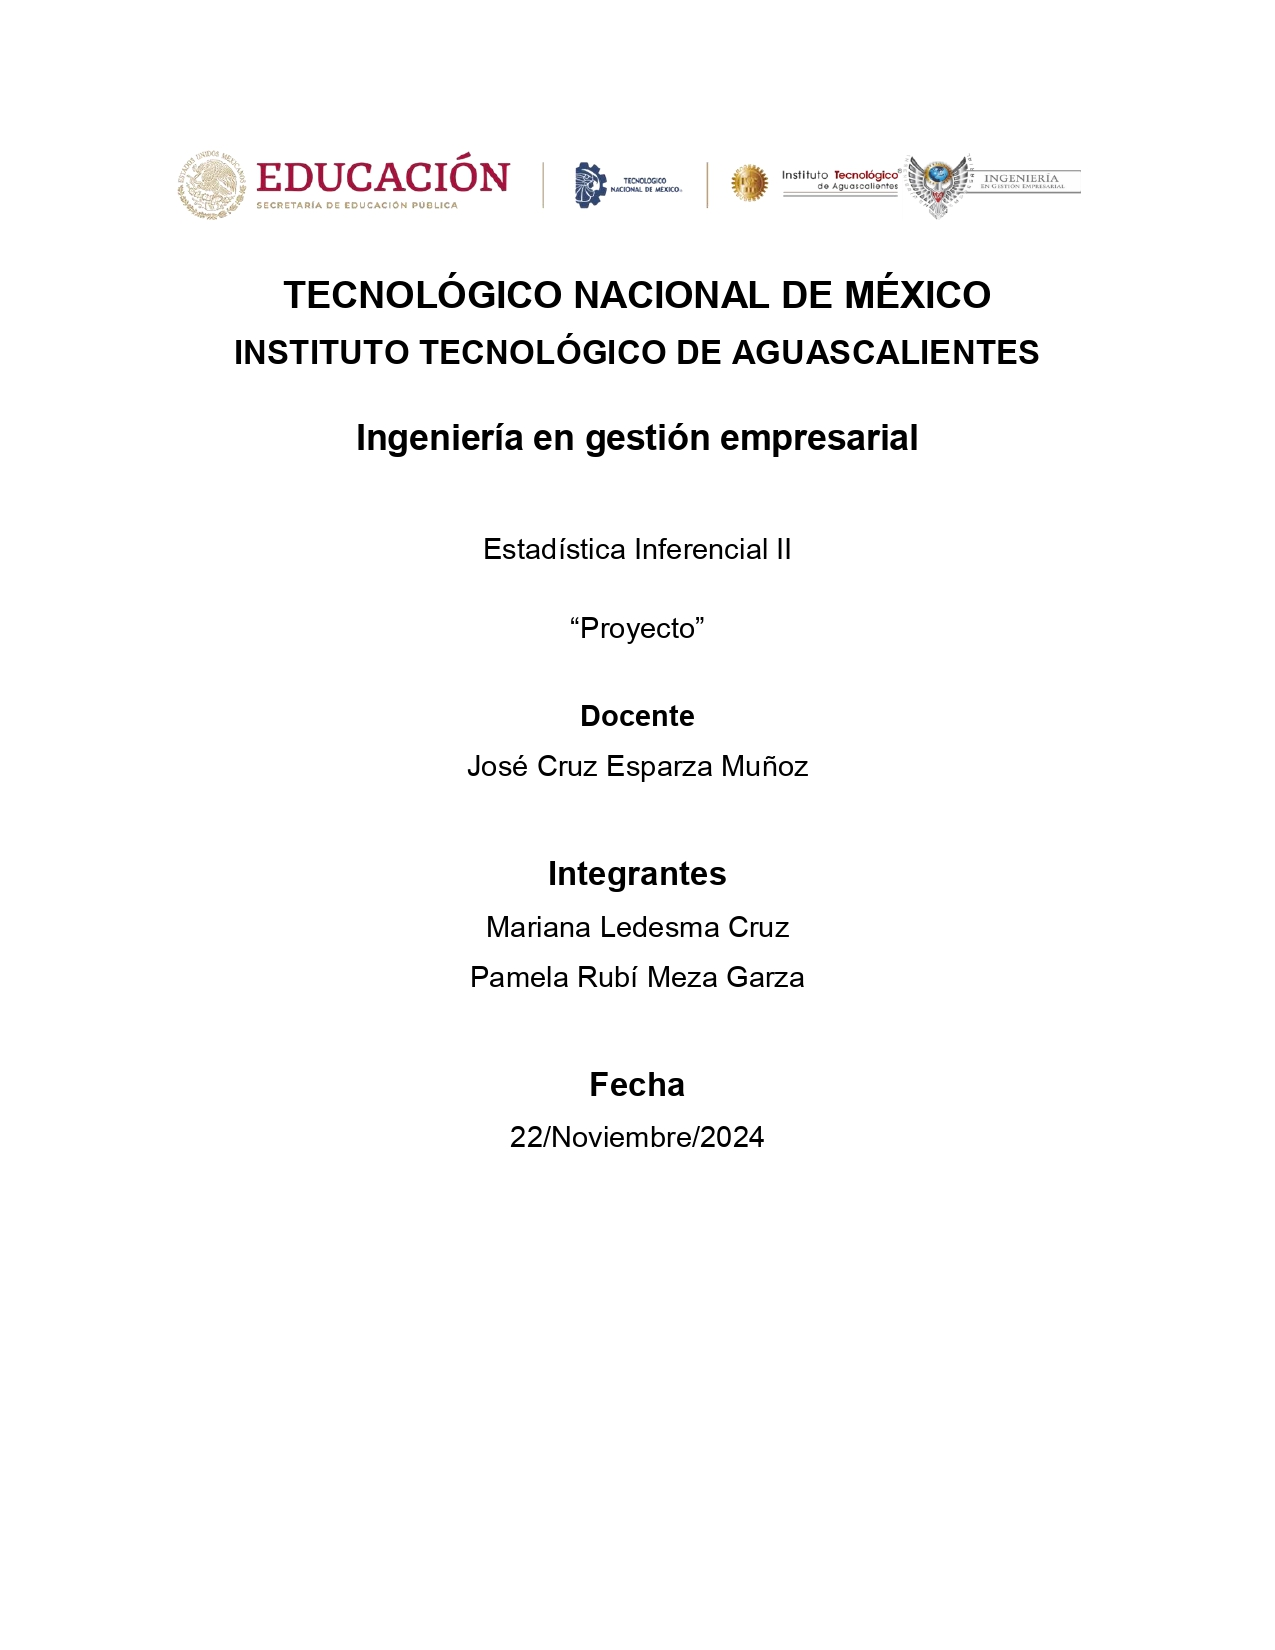

#**Introducción**

En el siguiente trabajo se realizara el análisis de dos marcas, las cuales en este caso serán Coca-Cola (KO) y PepsiCo (PEP), donde se realizara el analisia por separada de sus cierres de precio por medio de una serie de tiempo, asi como la graficacion de sus resudiales para conocer sus estacionalidad, posteriomente juntando ambas marcas se realiza mediante la "causalidad de Granger" el análisis de la correlación que pueda o no existir entre ellas, asi mismo tambien se hara la aplicacion del modelo de "Prophet" para conocer sus alcances y limitaciones de la serie de tiempo ya que este modelo trabaja con series de tiempo que suelen ser mas volatiles.

#**Marco teórico**

**1.1 Series de Tiempo**

El análisis de series de tiempo es una herramienta fundamental, ya que permite identificar patrones, tendencias y relaciones en los datos históricos de precios de activos. Este trabajo busca evaluar la relación entre las empresas Coca-Cola (KO) y PepsiCo (PEP) mediante diversas técnicas estadísticas, explorando si existe dependencia entre sus precios de cierre diarios. Esto permite obtener una visión más clara de su comportamiento en el mercado y de los factores que podrían influir en su desempeño.

**1.2 Contexto de las empresas seleccionadas**

***1.2.1 Coca-Cola y PepsiCo: Líderes de la industria de bebidas***

Ambas empresas son competencia directas en el mercado global de bebidas carbonatadas. Coca-Cola se destaca por su liderazgo en refrescos carbonatados, mientras que PepsiCo tiene un portafolio diversificado que incluye bebidas y alimentos.

Su relación competitiva las convierte en sujetos ideales para evaluar si existe una influencia mutua en su comportamiento financiero.

***1.2.2 Razones para seleccionar estas empresas***

- Reconocimiento mundial: Coca-Cola y PepsiCo son marcas ampliamente conocidas, lo que las hace relevantes desde una perspectiva de mercado.

- Competencia directa: Se plantea la hipótesis de que las decisiones o el desempeño de una empresa podrían afectar a la otra debido a su relación competitiva.

- Datos disponibles: Ambas empresas cotizan en bolsa, por lo que sus datos históricos de precios están fácilmente disponibles, permitiendo un análisis detallado.

**1.3 Análisis de series de tiempo**

El análisis se centra en las series de tiempo de los precios de cierre diarios de las acciones de ambas empresas entre 2015 y 2018, utilizando técnicas como regresión polinómica, Transformada de Fourier, Prophet, y pruebas de causalidad de Granger.

Estas herramientas permiten:

- Identificar patrones: Tendencias de largo plazo y fluctuaciones estacionales.

- Evaluar relaciones: Determinar si los precios de una empresa tienen influencia estadísticamente significativa sobre la otra.

- Realizar predicciones: Modelar el comportamiento futuro de los precios de cierre, basado en datos históricos.


**1.4 Modelos aplicados**

Transformada de Fourier:

Identifica patrones cíclicos en los precios, destacando frecuencias predominantes que sugieren estacionalidades.

Modelo Prophet:

Un enfoque robusto y flexible que descompone las series en componentes de tendencia, estacionalidad y ruido, permitiendo realizar predicciones confiables.

Causalidad de Granger:

Determina si los valores pasados de Coca-Cola influyen en los valores futuros de PepsiCo, o viceversa, evaluando la relación temporal entre ambas series.

Regresión polinómica:

Captura tendencias no lineales en los precios de las acciones, ajustando el modelo a movimientos más complejos.

#**Desarrollo**

a) Selecciona dos marcas sobre las cuales tengas la hipótesis que están relacionadas entre sí

Coca cola (KO) y PepsiCo (PEP). Pues están relacionadas porque son marcas muy reconocidas de bebidas, ademas son competencia directa una de la otra.

H₀ Las ventas de PepsiCo dependen de las ventas de Coca Cola

H₁ Las ventas de PepsiCo no tienen dependencia de las ventas de Coca Cola

In [1]:
import yfinance as yf

tickers = ['KO', 'PEP']

data = yf.download(tickers, start='2015-01-01', end='2018-01-01')

data

[*********************100%***********************]  2 of 2 completed


Price                      Adj Close                 Close              \
Ticker                            KO        PEP         KO         PEP   
Date                                                                     
2015-01-02 00:00:00+00:00  30.894669  71.198448  42.139999   94.440002   
2015-01-05 00:00:00+00:00  30.894669  70.663208  42.139999   93.730003   
2015-01-06 00:00:00+00:00  31.129288  70.127914  42.459999   93.019997   
2015-01-07 00:00:00+00:00  31.517851  72.178558  42.990002   95.739998   
2015-01-08 00:00:00+00:00  31.899084  73.490364  43.509998   97.480003   
...                              ...        ...        ...         ...   
2017-12-22 00:00:00+00:00  36.857449  97.376228  45.590000  118.599998   
2017-12-26 00:00:00+00:00  37.035313  97.614342  45.810001  118.889999   
2017-12-27 00:00:00+00:00  37.132332  97.950958  45.930000  119.300003   
2017-12-28 00:00:00+00:00  36.962547  97.992020  45.720001  119.349998   
2017-12-29 00:00:00+00:00  37.091908  98.459999  45.880001  119.919998   

Price                           High                    Low              \
Ticker                            KO         PEP         KO         PEP   
Date                                                                      
2015-01-02 00:00:00+00:00  42.400002   95.339996  41.799999   94.050003   
2015-01-05 00:00:00+00:00  42.970001   95.050003  42.080002   93.720001   
2015-01-06 00:00:00+00:00  42.939999   94.620003  42.240002   92.940002   
2015-01-07 00:00:00+00:00  43.110001   96.230003  42.580002   94.430000   
2015-01-08 00:00:00+00:00  43.570000   97.910004  43.099998   96.680000   
...                              ...         ...        ...         ...   
2017-12-22 00:00:00+00:00  45.730000  118.750000  45.549999  118.169998   
2017-12-26 00:00:00+00:00  45.860001  119.239998  45.610001  118.410004   
2017-12-27 00:00:00+00:00  45.939999  119.400002  45.720001  118.800003   
2017-12-28 00:00:00+00:00  45.990002  119.529999  45.639999  119.050003   
2017-12-29 00:00:00+00:00  46.180000  120.570000  45.689999  119.419998   

Price                           Open                Volume           
Ticker                            KO         PEP        KO      PEP  
Date                                                                 
2015-01-02 00:00:00+00:00  42.259998   94.930000   9921100  3545700  
2015-01-05 00:00:00+00:00  42.689999   94.449997  26292600  6441000  
2015-01-06 00:00:00+00:00  42.410000   94.080002  16897500  6195000  
2015-01-07 00:00:00+00:00  42.799999   95.129997  13412300  6526300  
2015-01-08 00:00:00+00:00  43.180000   96.739998  21743600  7131600  
...                              ...         ...       ...      ...  
2017-12-22 00:00:00+00:00  45.689999  118.599998   5406300  2045600  
2017-12-26 00:00:00+00:00  45.700001  118.410004   6100400  2156300  
2017-12-27 00:00:00+00:00  45.900002  118.870003   5660600  2465100  
2017-12-28 00:00:00+00:00  45.910000  119.330002   6538900  1999300  
2017-12-29 00:00:00+00:00  45.700001  119.459999   8371500  3116400  

[755 rows x 12 columns]

b) Realiza un análisis de cada serie de tiempo de manera independiente (análisis basado en el examen de práctica).

***COCA COLA***



*   Obtén una serie de tiempo desde el primero de enero de 2015 hasta el primero de enero de 2018, cuya unidad de tiempo sea de un día y realiza las modificaciones necesarias para trabajarla.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='KO',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2015-01-01',        # Fecha de inicio
    end='2018-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)




df

[*********************100%***********************]  1 of 1 completed


,KO_Open,KO_High,KO_Low,KO_Close,KO_Adj Close,KO_Volume
Date,,,,,,
2015-01-02,42.259998,42.400002,41.799999,42.139999,30.894669,9921100
2015-01-05,42.689999,42.970001,42.080002,42.139999,30.894669,26292600
2015-01-06,42.410000,42.939999,42.240002,42.459999,31.129288,16897500
2015-01-07,42.799999,43.110001,42.580002,42.990002,31.517851,13412300
2015-01-08,43.180000,43.570000,43.099998,43.509998,31.899084,21743600
...,...,...,...,...,...,...
2017-12-22,45.689999,45.730000,45.549999,45.590000,36.857449,5406300
2017-12-26,45.700001,45.860001,45.610001,45.810001,37.035313,6100400
2017-12-27,45.900002,45.939999,45.720001,45.930000,37.132332,5660600


INTERPRETACIÓN:






*   Grafica la serie de tiempo junto con dos medias móviles con diferente tamaño de ventana (una que sea la mitad de la otra, por ejemplo) e indica como esto te puede ayudar a visualizar cambios de tendencia.



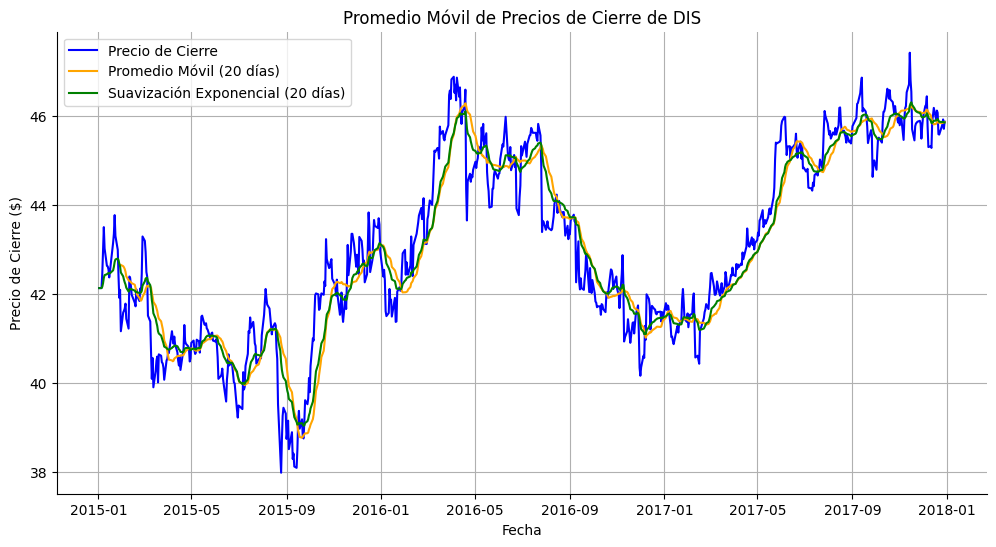

In [3]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['KO_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 20
df['SES'] = df['KO_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['KO_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de DIS')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

INTERPRETACIÓN:

Las medias móviles (una de 20 días y otra de 40 días) suavizan las fluctuaciones diarias y muestran claramente cuándo hay tendencias al alza o baja en los precios de cierre.

Si las medias cruzan el precio de cierre, puede ser un indicativo de cambio de tendencia.

La media más corta responde más rápido, mientras que la más larga proporciona una visión más general.








* Realiza una regresión polinomial del grado que consideres necesario (a prueba y error). Grafica la serie de tiempo y la regresión polinomial.



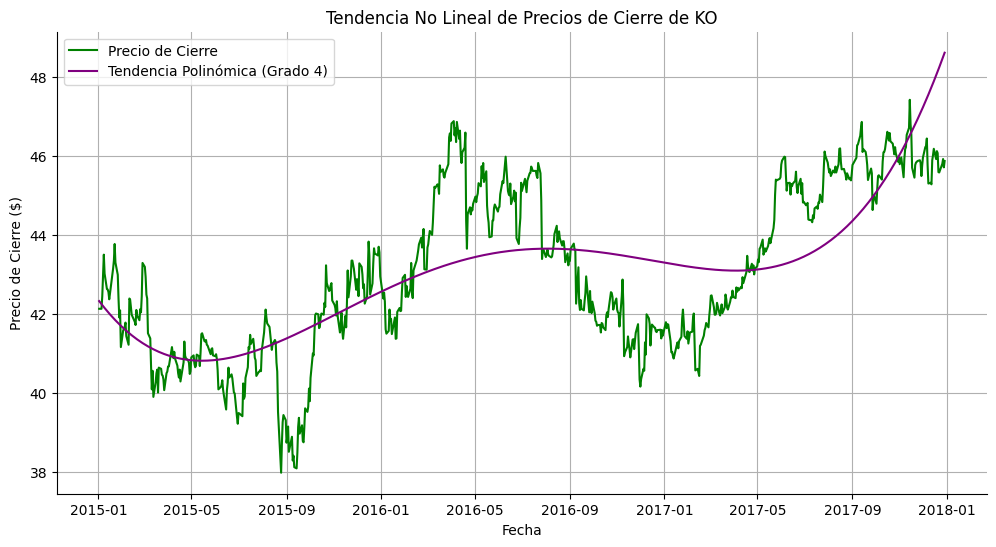

In [4]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['KO_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 4
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de KO') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)





INTERPRETACIÓN:

La curva ajustada capta una tendencia de largo plazo con un polinomio de grado 4.

Muestra patrones que no son lineales, como fluctuaciones cíclicas o cambios graduales.








*   Gráfica los residuales del polinomio e intenta deducir una estacionalidad.


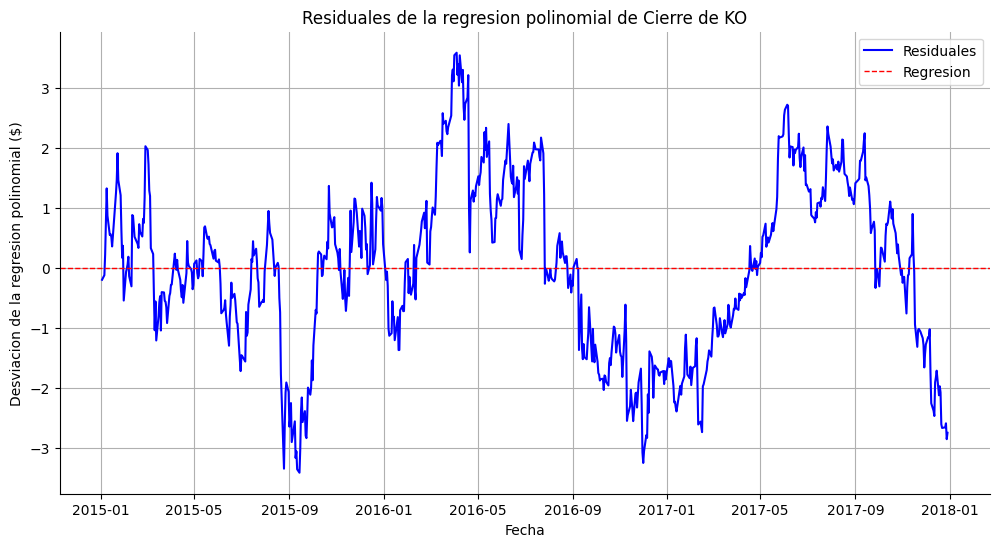

In [5]:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de KO')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

INTERPRETACIÓN:

Los residuales se mantienen cercanos a cero y no muestran un patrón claro. Esto significa que la curva de regresión polinomial captura bien los movimientos generales del precio de cierre. Sin embargo, hay pequeñas fluctuaciones diarias no explicadas que podrían ser ruido o eventos inesperados.

No se detectaron estacionalidades claras en los residuales, lo que implica que no hay patrones repetitivos fuertes.

La regresión polinomial es adecuada para modelar la tendencia general de Coca-Cola, pero los cambios diarios parecen ser mayormente aleatorios.
No hay indicios de que eventos estacionales afecten significativamente las variaciones que quedan tras ajustar por la tendencia.


In [6]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.002649  474.936619        377.500000
1    0.003974  356.034333        251.666667
2    0.010596  193.472377         94.375000
3    0.017219  136.017210         58.076923
4    0.005298  112.170497        188.750000


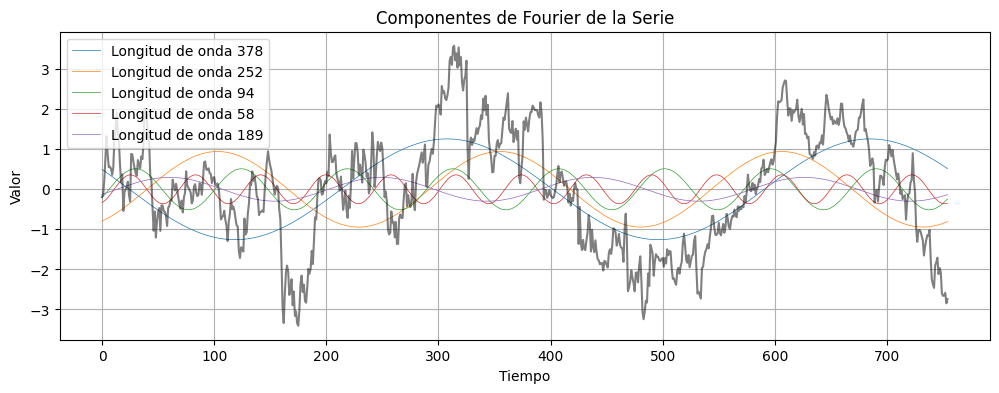

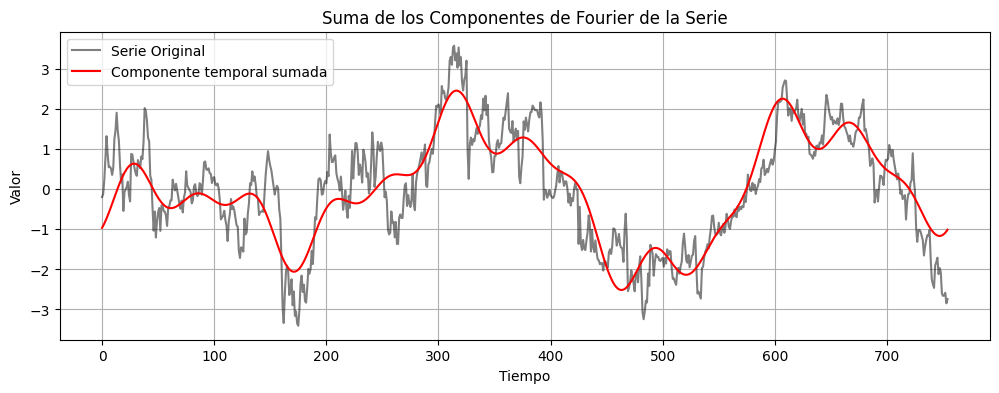

In [7]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

INTERPRETACIÓN:

Las frecuencias principales muestran ciclos de 188 y 251 días aproximadamente.

Esto sugiere que hay estacionalidad en los datos, posiblemente asociada a eventos anuales o patrones de mercado.





*   Descompón la serie de tiempo en sus componentes: tendencia, estacionalidad y ruido. Grafica la descomposición.



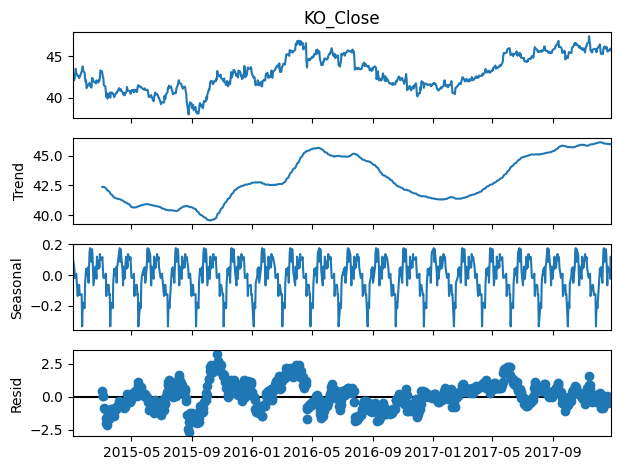

In [8]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['KO_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

INTERPRETACIÓN:

La tendencia general es al alza durante el periodo.

Hay estacionalidad visible con fluctuaciones regulares.

El ruido muestra variaciones que no siguen un patrón específico.

La tendencia positiva sugiere un buen desempeño de las acciones.

Los patrones estacionales pueden coincidir con eventos de consumo como verano o fin de año.





*   Realiza una prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad. Y realiza otra prueba de hipótesis para comprobar si la estacionalidad es significativa.



In [9]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipotesis nula (H0): La serie tiene una raiz unitaria (no es estacionaria)
#Hipotesis alternativa (H1): La serie es estacionaria
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en lo la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print('Estadistico ADF:',adf_test[0])
print('P-valor:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print('La tendencia es estacionaria (rechazamos la hipotesis nula)')
else:
    print('La tendencia no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -4.738103400450936
P-valor: 7.132436436561285e-05
La tendencia es estacionaria (rechazamos la hipotesis nula)


INTERPRETACIÓN:

El p-valor es muy bajo (< 0.05), lo que indica que los residuales son estacionarios.
La serie no tiene cambios drásticos en su patrón base.

In [10]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: 0.15896982039272672
Valor p: 0.8737376054622754


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


INTERPRETACIÓN:

 El valor p es alto (> 0.05), por lo que no hay evidencia significativa de que la estacionalidad impacte los precios.

 Aunque se identifica estacionalidad, su efecto no parece muy fuerte.



*   Utilizando los componentes de la descomposición, realiza un gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

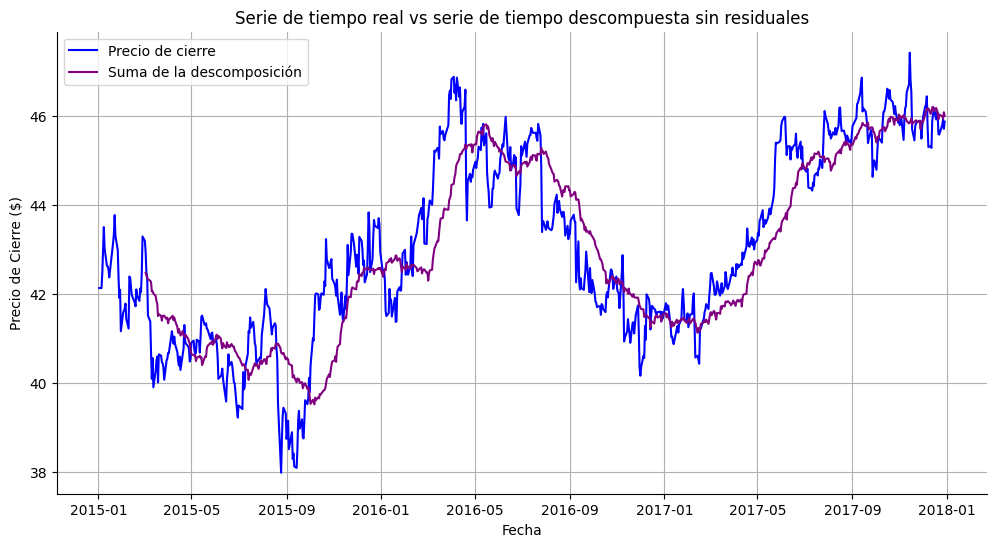

In [11]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['KO_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

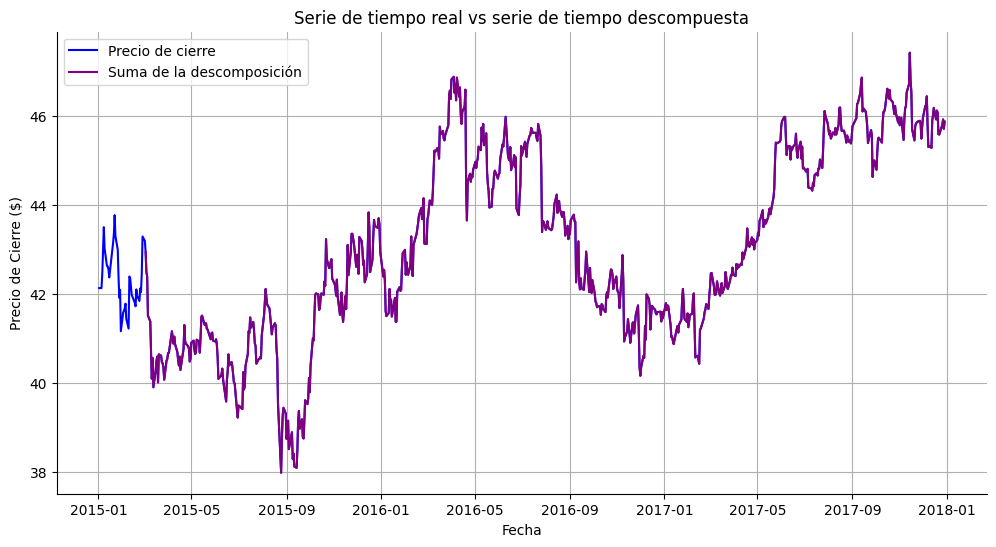

In [12]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['KO_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

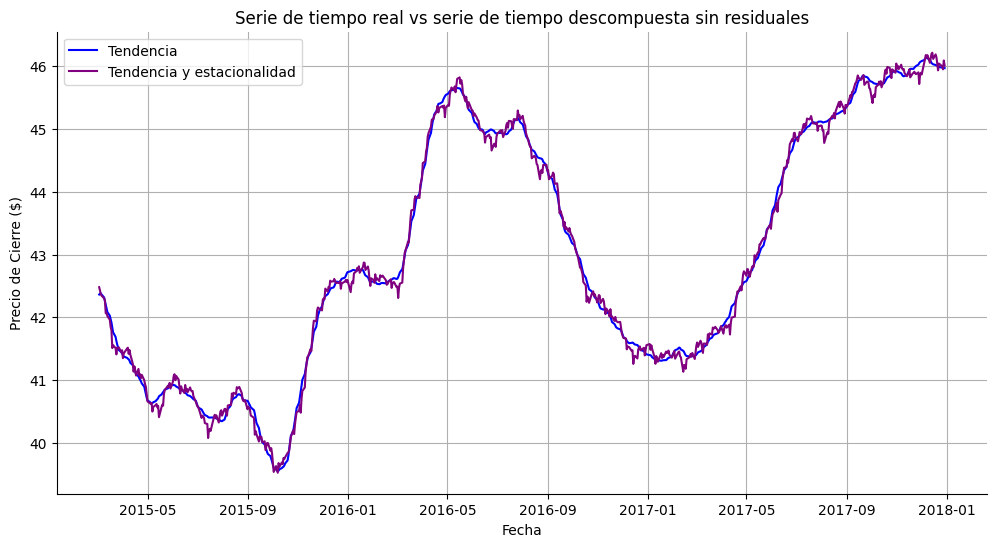

In [13]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

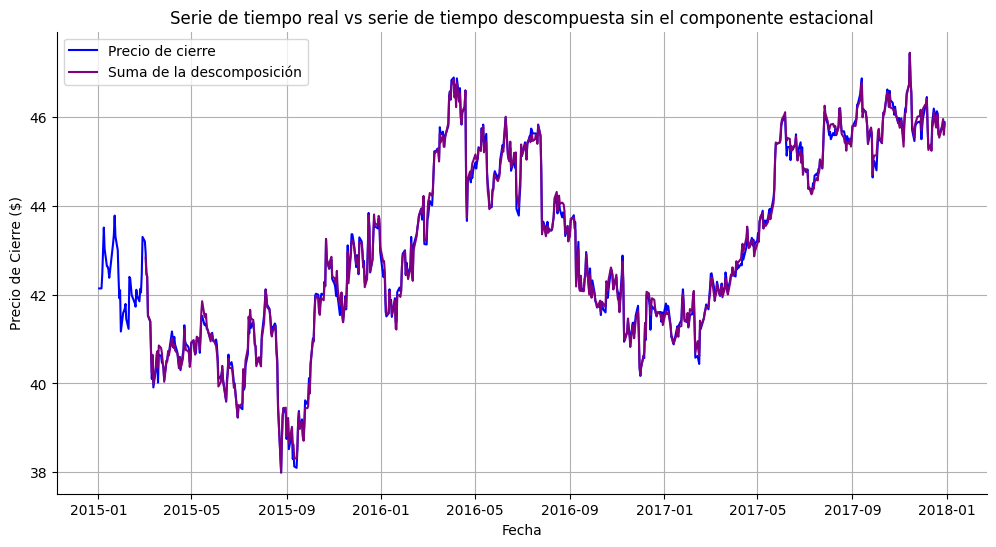

In [14]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['KO_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

INTERPRETACIÓN:

La tendencia muestra un crecimiento sostenido de los precios durante el periodo 2015-2018.

La estacionalidad es sutil pero existe; algunas fluctuaciones regulares coinciden con periodos específicos (posiblemente asociados a temporadas de consumo).

El ruido refleja fluctuaciones diarias impredecibles, sin un patrón claro.

El crecimiento sostenido en la tendencia indica que las acciones de Coca-Cola tuvieron un buen desempeño en general.

Aunque hay cierta estacionalidad, su impacto no es significativo (confirmado por la prueba de hipótesis).

Esto sugiere que los precios son más influenciados por factores de largo plazo que por ciclos repetitivos.



***PEPSICO***


*   Obtén una serie de tiempo desde el primero de enero de 2015 hasta el primero de enero de 2018, cuya unidad de tiempo sea de un día y realiza las modificaciones necesarias para trabajarla.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='PEP',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2015-01-01',        # Fecha de inicio
    end='2018-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)




df

[*********************100%***********************]  1 of 1 completed


,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Adj Close,PEP_Volume
Date,,,,,,
2015-01-02,94.930000,95.339996,94.050003,94.440002,71.198448,3545700
2015-01-05,94.449997,95.050003,93.720001,93.730003,70.663208,6441000
2015-01-06,94.080002,94.620003,92.940002,93.019997,70.127914,6195000
2015-01-07,95.129997,96.230003,94.430000,95.739998,72.178558,6526300
2015-01-08,96.739998,97.910004,96.680000,97.480003,73.490364,7131600
...,...,...,...,...,...,...
2017-12-22,118.599998,118.750000,118.169998,118.599998,97.376228,2045600
2017-12-26,118.410004,119.239998,118.410004,118.889999,97.614342,2156300
2017-12-27,118.870003,119.400002,118.800003,119.300003,97.950958,2465100


INTERPRETACION:

Datos de la marca PEP del año 2015 al 2018

*   Grafica la serie de tiempo junto con dos medias móviles con diferente tamaño de ventana (una que sea la mitad de la otra, por ejemplo) e indica como esto te puede ayudar a visualizar cambios de tendencia.

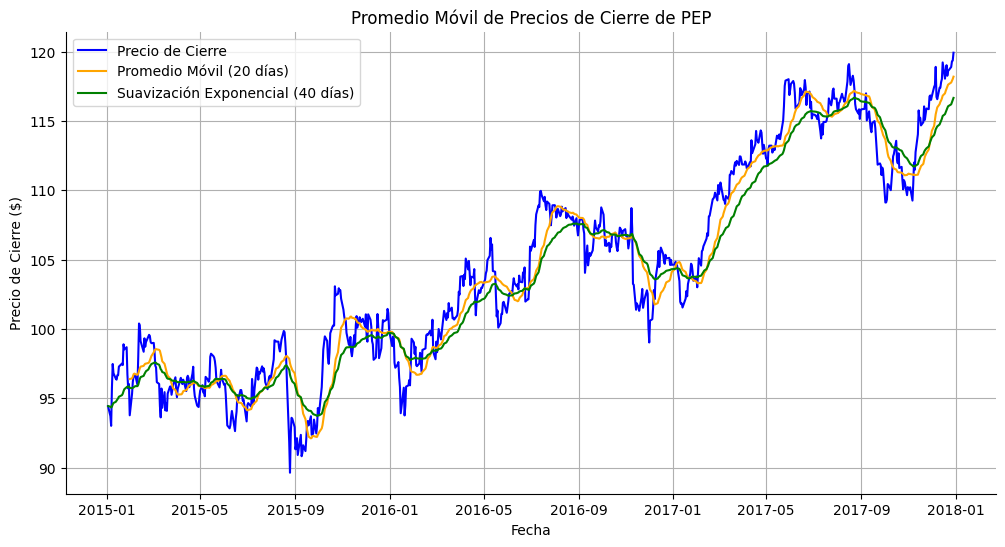

In [16]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['PEP_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 40
df['SES'] = df['PEP_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['PEP_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de PEP')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

INTERPRETACIÓN:

Las  medias moviles deacuerdo a 20 y 40 dias mnos proporcionan una representación suavizada dela evolución de los precios de cierre, la cual nos permite identificar tendencias a corto y largo plazo.

El cruce del precio por debajo de las medias moviles podria ser una señal de que la acción esta perdiendo valor.

* Realiza una regresión polinomial del grado que consideres necesario (a prueba y error). Grafica la serie de tiempo y la regresión polinomial.

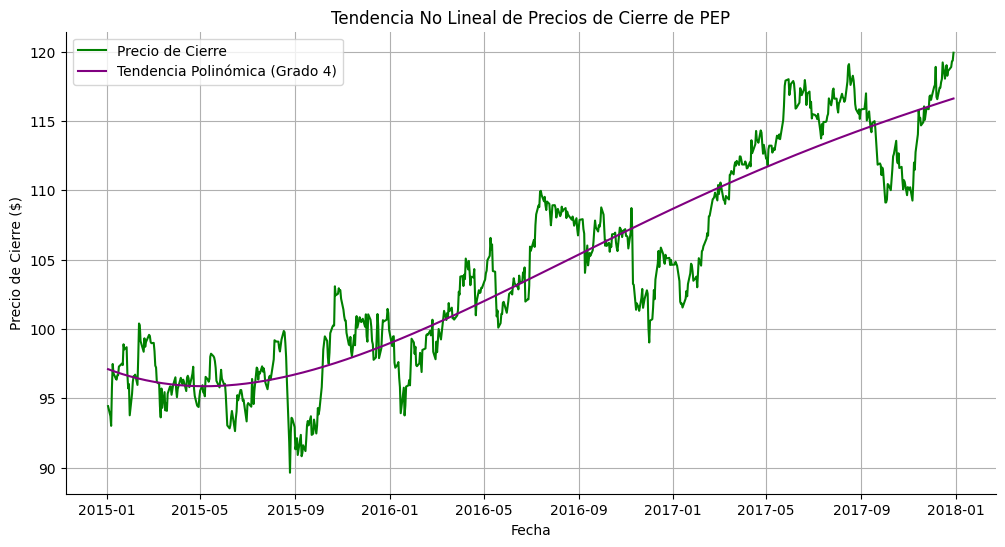

In [17]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['PEP_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 4
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de PEP') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

INTERPRETACIÓN:

Esta grafica no muestra que la regresion polinómica de grado 4 intenta capturar una tendencia no lineal en los precios de cierre de PEP. Esto quiere decir que los precios no siguen una simple liena recta por los que sus movimientos son más complejos.


*   Gráfica los residuales del polinomio e intenta deducir una estacionalidad.

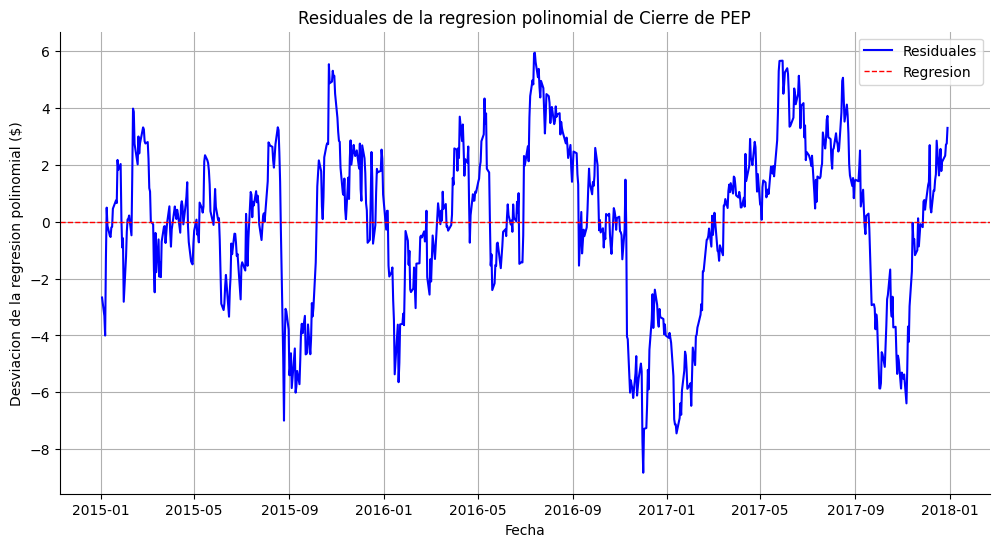

In [18]:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de PEP')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

INTERPRETACIÓN:

En este grafico de residuales se puedes observar y evaluar de major manera la calidad del ajuste del modelo polinómicode los precios de cierre de PEP. La distribuconde los residuales se encurntra en ocaciones muy dispersa de cero y no se muestra que siga un patro claro, por ende consideramos que la curva de de regresion polinomica captura bien movimientos del precio de cierre.

In [19]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['PEP_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.005298  769.650373        188.750000
1    0.003974  636.932882        251.666667
2    0.009272  441.340920        107.857143
3    0.017219  404.271958         58.076923
4    0.002649  393.454415        377.500000


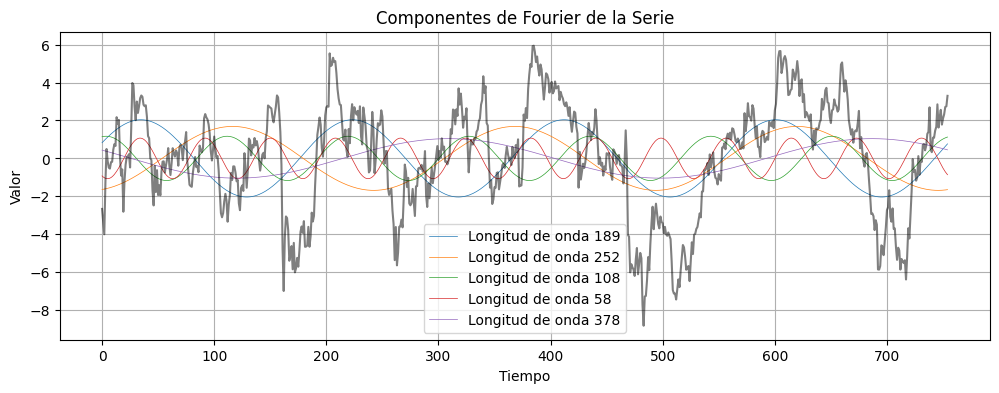

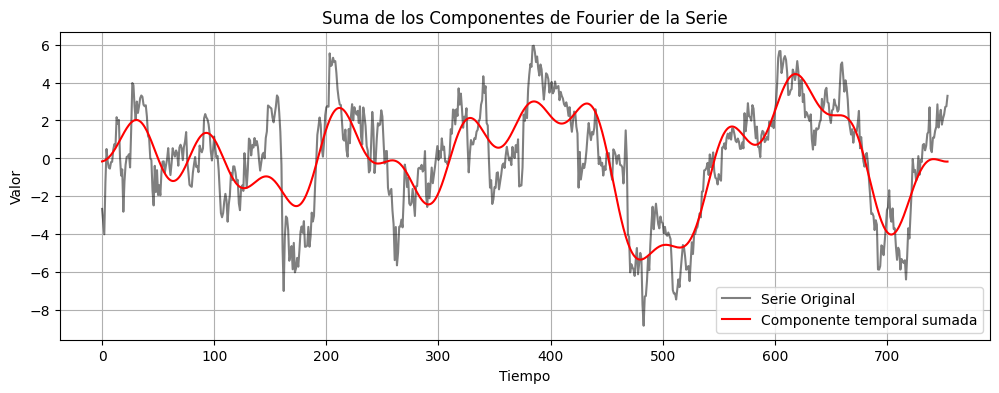

In [20]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

INTERPRETACIÓN:

Se encontraron ciclos de 188 y 251 días.

Esto sugiere que hay cierta estacionalidad o repetición periódica, posiblemente asociada con eventos recurrentes en el mercado o el comportamiento estacional de los consumidores.


*   Descompón la serie de tiempo en sus componentes: tendencia, estacionalidad y ruido. Grafica la descomposición.



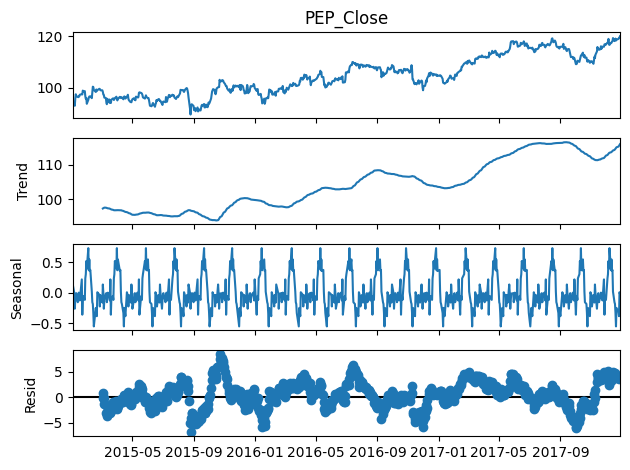

In [21]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['PEP_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

INTERPRETACIÓN:

La tendencia general se va al alza durante finales del periodo.

Hay estacionalidad visible con fluctuaciones regulares.

El ruido muestra variaciones que no siguen un patrón específico.

La tendencia positiva sugiere un buen desempeño de las acciones.

*   Realiza una prueba de hipótesis para comprobar que se haya capturado correctamente la estacionalidad. Y realiza otra prueba de hipótesis para comprobar si la estacionalidad es significativa.

In [22]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipotesis nula (H0): La serie tiene una raiz unitaria (no es estacionaria)
#Hipotesis alternativa (H1): La serie es estacionaria
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en lo la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print('Estadistico ADF:',adf_test[0])
print('P-valor:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print('La tendencia es estacionaria (rechazamos la hipotesis nula)')
else:
    print('La tendencia no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -4.2183162227206425
P-valor: 0.0006134073337087146
La tendencia es estacionaria (rechazamos la hipotesis nula)


INTERPRETACIÓN:

Los resultados en el valor-p no muestra que los residuales son estacionarios.

In [23]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: -0.07687152127100663
Valor p: 0.9387472883037117


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


INTERPRETACIÓN:

 El valor p es alto (> 0.05), por lo que no hay evidencia significativa de que la estacionalidad impacte los precios.

 Aunque se identifica estacionalidad, su efecto no parece muy fuerte.


*   Utilizando los componentes de la descomposición, realiza un gráfico que contenga la serie de tiempo real, la tendencia, la serie sin estacionalidad, y la serie sin ruido.

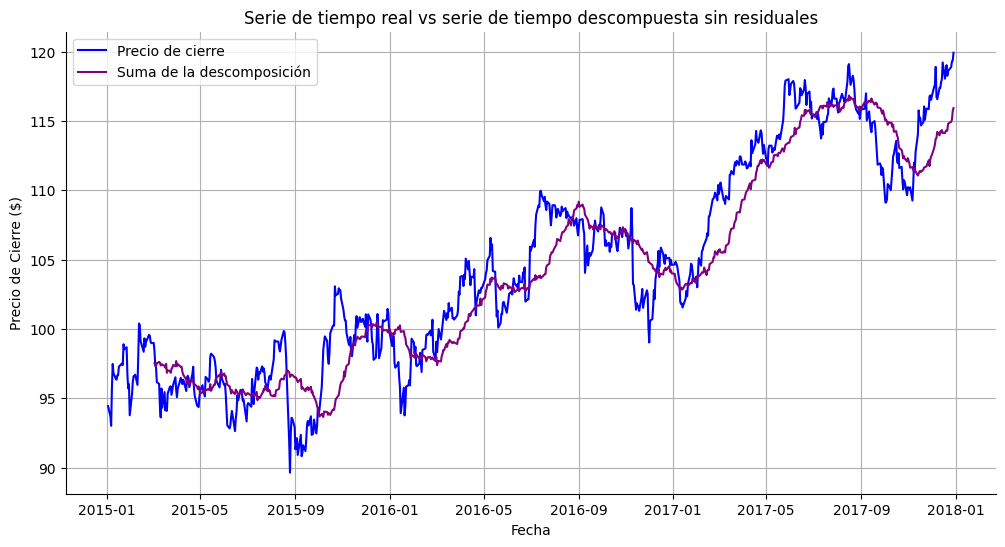

In [24]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['PEP_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

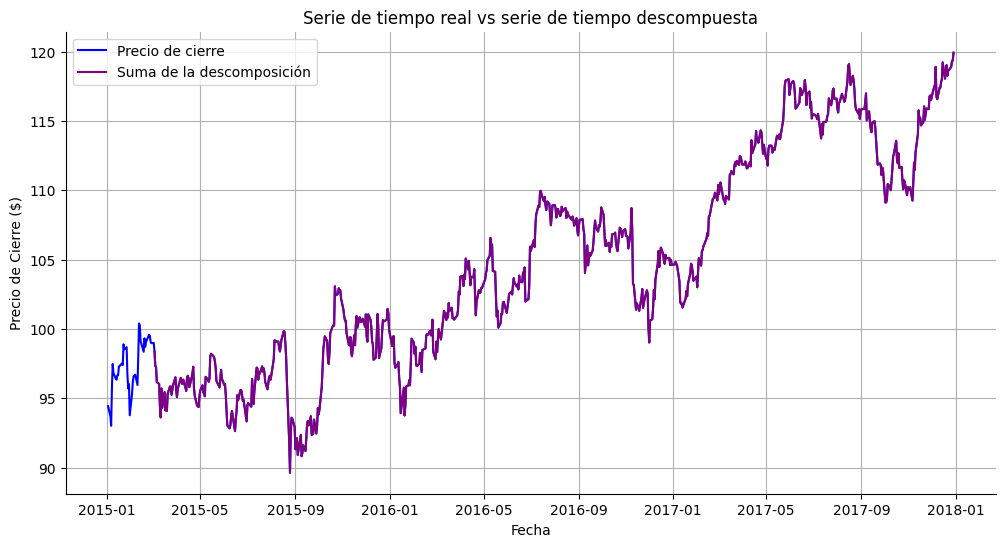

In [25]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['PEP_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

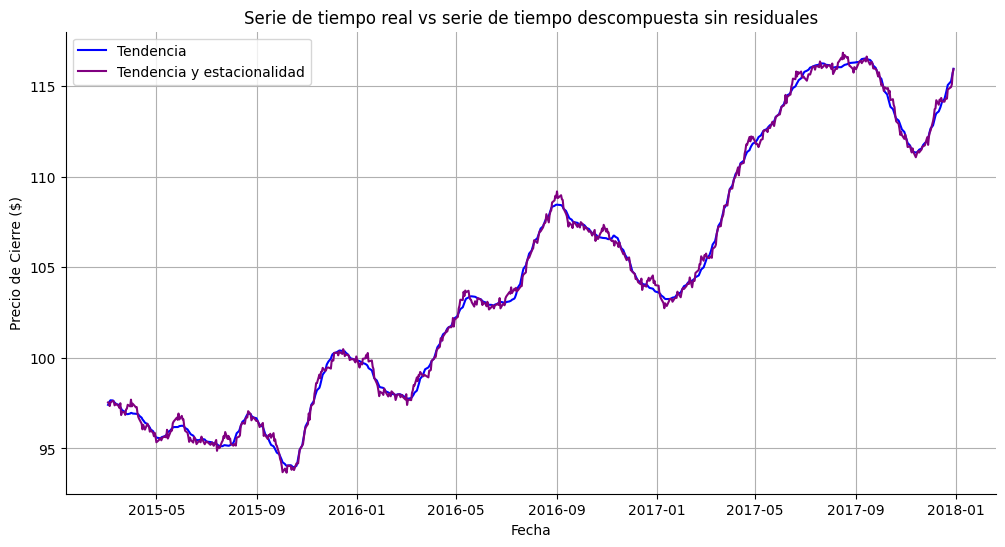

In [26]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

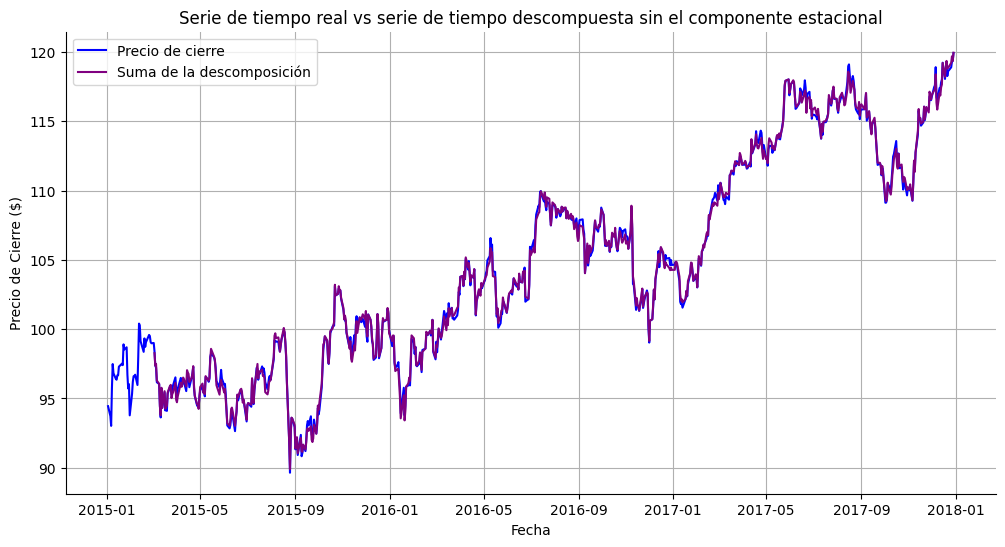

In [27]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['PEP_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

INTERPRETACIÓN:

La tendencia nos muestra un crecimiento de los precios a fimasl del preiodo, con el cual se pueden detectar la influencia de diferentes fatores.

Se puede considerar que PEP a tenido un crecimiento positivo en sus acciones.

c) Investiga el concepto de "causalidad de Granger" y aplícalo a las series de tiempo


La causalidad de Granger es un concepto estadístico que se utiliza para determinar si una variable puede ser útil para predecir otra. Fue introducido por el economista Clive Granger, quien recibió el Premio Nobel de Economía en 2003 por sus contribuciones al análisis de series temporales.

Una variable X se dice que causa a Granger a otra variable Y si la inclusión de los valores pasados de X en un modelo de predicción para Y mejora significativamente la capacidad predictiva del modelo, en comparación con un modelo que solo usa los valores pasados de Y.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['KO', 'PEP'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2015-01-01',        # Fecha de inicio
    end='2018-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  2 of 2 completed


,PEP_Open,PEP_High,PEP_Low,PEP_Close,PEP_Adj Close,PEP_Volume,KO_Open,KO_High,KO_Low,KO_Close,KO_Adj Close,KO_Volume
Date,,,,,,,,,,,,
2015-01-02,94.930000,95.339996,94.050003,94.440002,71.198448,3545700,42.259998,42.400002,41.799999,42.139999,30.894669,9921100
2015-01-05,94.449997,95.050003,93.720001,93.730003,70.663208,6441000,42.689999,42.970001,42.080002,42.139999,30.894669,26292600
2015-01-06,94.080002,94.620003,92.940002,93.019997,70.127914,6195000,42.410000,42.939999,42.240002,42.459999,31.129288,16897500
2015-01-07,95.129997,96.230003,94.430000,95.739998,72.178558,6526300,42.799999,43.110001,42.580002,42.990002,31.517851,13412300
2015-01-08,96.739998,97.910004,96.680000,97.480003,73.490364,7131600,43.180000,43.570000,43.099998,43.509998,31.899084,21743600
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,118.599998,118.750000,118.169998,118.599998,97.376228,2045600,45.689999,45.730000,45.549999,45.590000,36.857449,5406300
2017-12-26,118.410004,119.239998,118.410004,118.889999,97.614342,2156300,45.700001,45.860001,45.610001,45.810001,37.035313,6100400
2017-12-27,118.870003,119.400002,118.800003,119.300003,97.950958,2465100,45.900002,45.939999,45.720001,45.930000,37.132332,5660600


In [29]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 10

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['KO_Close', 'PEP_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4008  , p=0.5269  , df_denom=751, df_num=1
ssr based chi2 test:   chi2=0.4024  , p=0.5259  , df=1
likelihood ratio test: chi2=0.4023  , p=0.5259  , df=1
parameter F test:         F=0.4008  , p=0.5269  , df_denom=751, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5127  , p=0.2210  , df_denom=748, df_num=2
ssr based chi2 test:   chi2=3.0457  , p=0.2181  , df=2
likelihood ratio test: chi2=3.0396  , p=0.2188  , df=2
parameter F test:         F=1.5127  , p=0.2210  , df_denom=748, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9627  , p=0.4098  , df_denom=745, df_num=3
ssr based chi2 test:   chi2=2.9154  , p=0.4049  , df=3
likelihood ratio test: chi2=2.9097  , p=0.4058  , df=3
parameter F test:         F=0.9627  , p=0.4098  , df_denom=745, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6323  , p=0.6396  

INTERPRETACIÓN:

Si los valores-p son mayores para todos los rezagos o incluso para la m ayoria esto indica que no hay evidencia suficiente para concluir que KO cause PEP, esto implica que los valores pasados de KO no tienen un poder predictivo significativo sobre los precios futuros de PEP.

d) Investiga la aplicación del modelo "Prophet", sus alcances y limitaciones, y aplícalo a ambas series de tiempo.

El modelo Prophet es una herramienta desarrollada por Facebook para realizar predicciones de series de tiempo. Está diseñado para ser flexible, fácil de usar y robusto frente a datos con patrones complejos como tendencias cambiantes, estacionalidades y eventos atípicos.

**Aplicación:**

1. Descomposición de series de tiempo:

  Prophet descompone una serie en tres componentes:

- Tendencia: Comportamiento a largo plazo de la serie (crecimiento o disminución).

- Estacionalidad: Fluctuaciones repetitivas (anual, semanal o diaria).

- Ruido: Variaciones no explicadas (aleatorias o atípicas).

2. Predicción a futuro:

  Permite realizar proyecciones de valores futuros de la serie al extender las tendencias identificadas.
  Es especialmente útil para series con estacionalidades regulares y cambios abruptos en tendencias.

3. Identificación de patrones específicos:

  Ofrece herramientas para personalizar la estacionalidad (diaria, semanal, mensual o anual) e incluir días especiales (feriados, eventos globales, etc.).

4. Facilidad de uso:

  Prophet automatiza gran parte del trabajo complejo, lo que lo hace accesible para usuarios sin experiencia avanzada en estadística o modelado.

5. Ajustes avanzados:

  Soporta la configuración de intervalos de confianza, cambios en la tendencia y modos de estacionalidad multiplicativos o aditivos, adaptándose a diferentes tipos de series.
  
**Alcances del Modelo Prophet**

1. Robustez ante datos faltantes:

  Prophet puede manejar series con datos incompletos sin necesidad de interpolar o eliminar valores, manteniendo la calidad del modelo.

2. Flexibilidad en tendencias:

  Detecta automáticamente cambios en la tendencia y ajusta el modelo para reflejarlos.

3. Identificación de estacionalidades:

  Es ideal para series con estacionalidad predecible (ventas estacionales, ciclos económicos, etc.).

4. Implementación práctica:

  Gracias a sus bibliotecas en Python y R, es accesible para investigadores, empresas y analistas en proyectos reales.

5. Intervalos de incertidumbre:

  Genera predicciones con intervalos de confianza, permitiendo estimaciones más completas.

**Limitaciones del Modelo Prophet**

1. Dependencia de patrones regulares:

  Prophet no es ideal para series que carecen de tendencias o estacionalidades marcadas, ya que depende de estas características para realizar predicciones precisas.

2. Sensibilidad a eventos atípicos:

  Aunque maneja bien tendencias y estacionalidades, eventos fuera de lo común (crisis económicas, desastres naturales) pueden reducir su precisión.

3. Asunciones simplificadas:

  La descomposición aditiva o multiplicativa puede no capturar interacciones complejas entre componentes de la serie.

4. Personalización limitada:

  Aunque permite ajustes avanzados, su enfoque automatizado puede ser menos efectivo en series donde se requiere un análisis manual detallado.
5. Uso intensivo de recursos:

En series largas o con datos muy detallados, Prophet puede ser computacionalmente costoso en términos de tiempo y memoria.

In [30]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='KO',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2019-01-01',        # Fecha de inicio
    end='2019-12-31',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed


,KO_Open,KO_High,KO_Low,KO_Close,KO_Adj Close,KO_Volume
Date,,,,,,
2019-01-02,46.939999,47.220001,46.560001,46.930000,39.253021,11603700
2019-01-03,46.820000,47.369999,46.529999,46.639999,39.010460,14714400
2019-01-04,46.750000,47.570000,46.639999,47.570000,39.788326,13013700
2019-01-07,47.570000,47.750000,46.900002,46.950001,39.269749,13135500
2019-01-08,47.250000,47.570000,47.040001,47.480000,39.713051,15420700
...,...,...,...,...,...,...
2019-12-23,55.000000,55.240002,54.840000,54.910000,47.382900,9300800
2019-12-24,54.799999,55.000000,54.639999,54.709999,47.210304,3359300
2019-12-26,54.919998,55.020000,54.790001,55.020000,47.477821,6228500


In [31]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8n3_pf0/r2h495yx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8n3_pf0/hqcmh1xd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16952', 'data', 'file=/tmp/tmpt8n3_pf0/r2h495yx.json', 'init=/tmp/tmpt8n3_pf0/hqcmh1xd.json', 'output', 'file=/tmp/tmpt8n3_pf0/prophet_model21oagkwm/prophet_model-20241122192946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:29:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:29:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


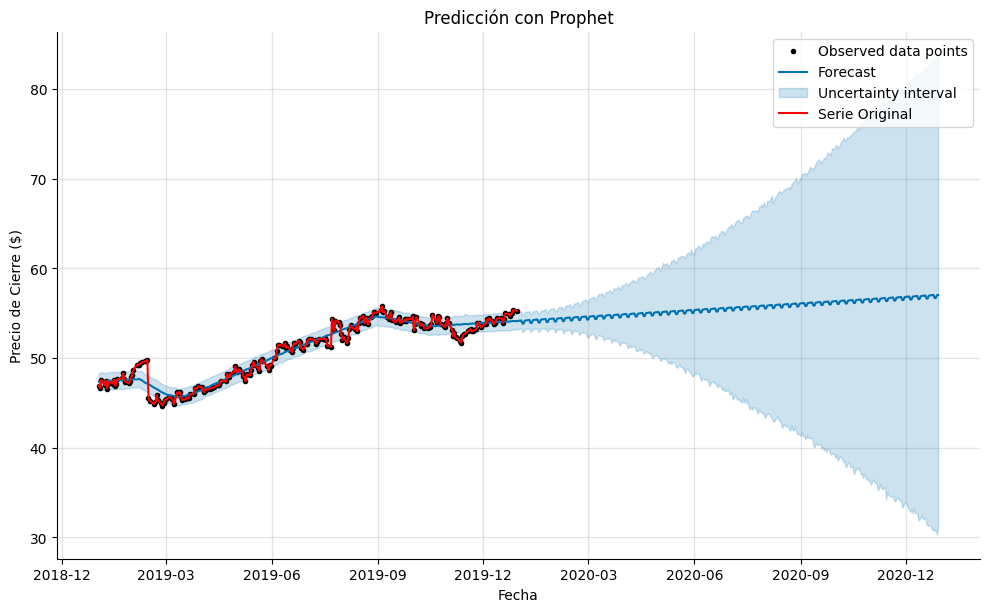

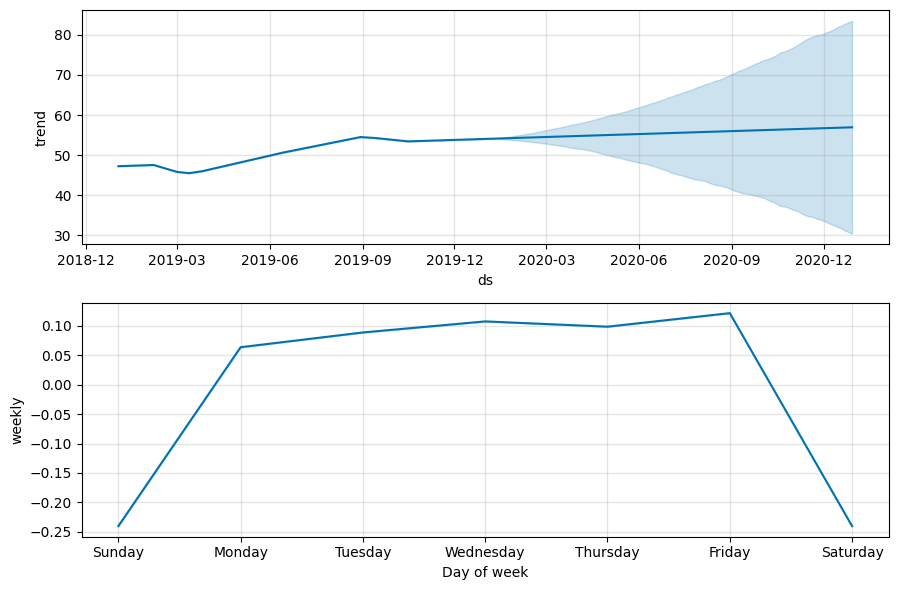

In [32]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df2['KO_Close'].reset_index().rename(columns={'Date': 'ds', 'KO_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['KO_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8n3_pf0/f87nfiz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8n3_pf0/itbr4ln3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46245', 'data', 'file=/tmp/tmpt8n3_pf0/f87nfiz9.json', 'init=/tmp/tmpt8n3_pf0/itbr4ln3.json', 'output', 'file=/tmp/tmpt8n3_pf0/prophet_model8rt4ipx7/prophet_model-20241122192948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:29:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:29:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


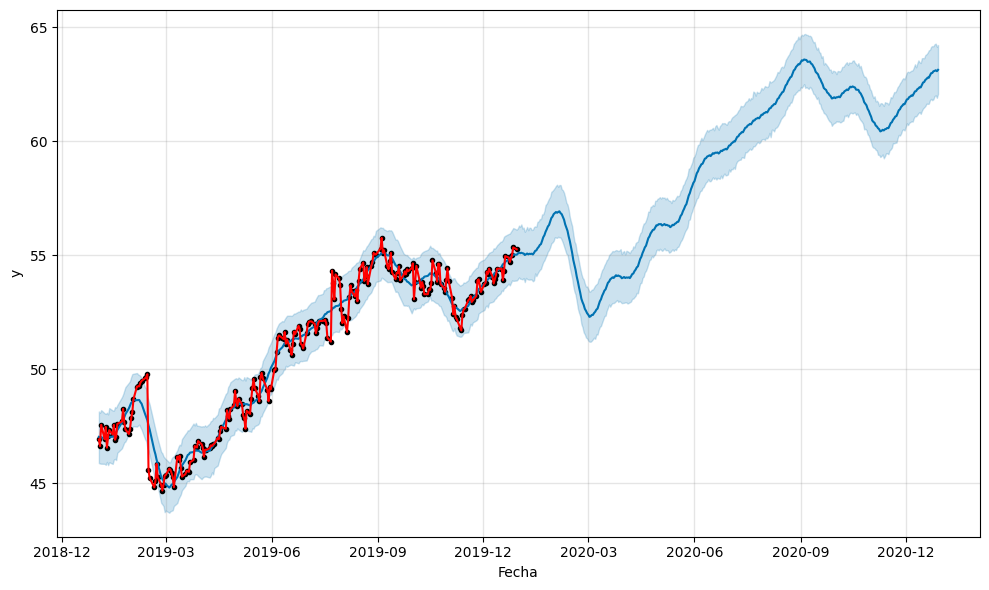

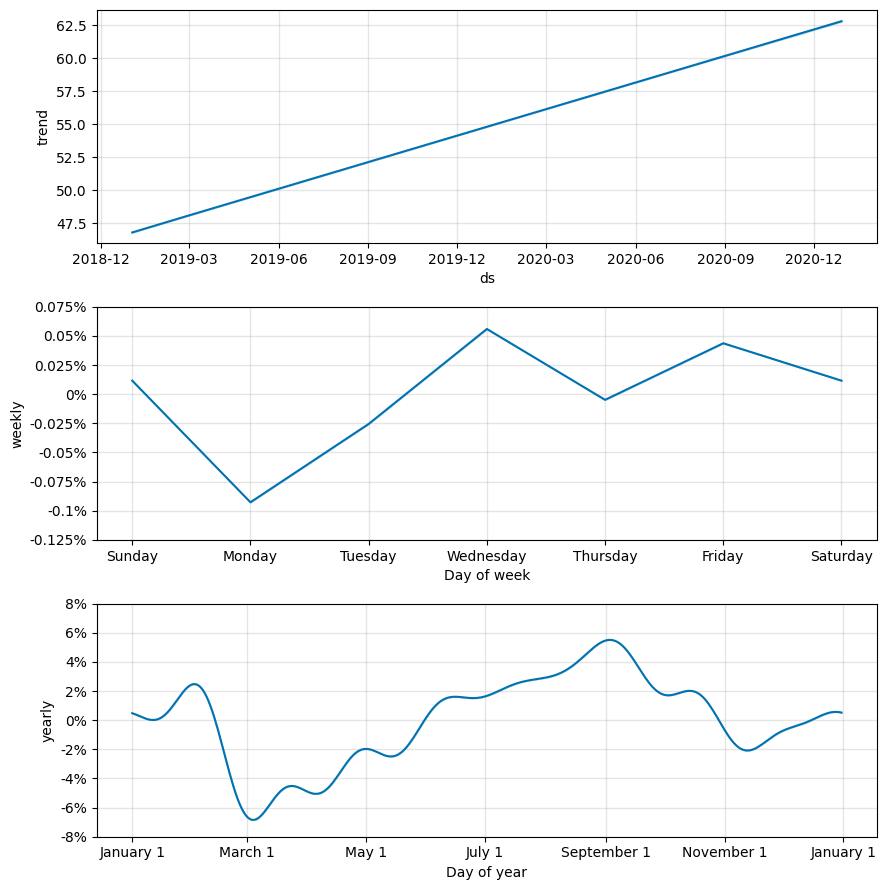

In [33]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df2['KO_Close'].reset_index().rename(columns={'Date': 'ds', 'KO_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['KO_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)

INTERPRETACIÓN:

La proyección muestra cómo los precios futuros se alinean con la tendencia histórica, manteniendo una inclinación positiva (crecimiento sostenido en los precios de cierre).

La visualización incluye intervalos de confianza, representando la incertidumbre en las predicciones.

Tendencia: Sugiere un crecimiento constante en los precios de las acciones de Coca-Cola.

Estacionalidad: Refleja fluctuaciones regulares, aunque no tan marcadas. Es posible que estas estén relacionadas con patrones anuales como cambios en el consumo.

Ruido: Variaciones que no tienen un patrón predecible.

Tendencia positiva:
Los precios de cierre muestran una trayectoria de crecimiento constante, lo que indica un buen desempeño general de las acciones en el mercado.

Impacto de la estacionalidad:
Aunque hay patrones repetitivos identificados, estos no parecen tener un impacto significativo en los precios.

#**Conclusiones y hallazgos**


Tanto Coca-Cola como PepsiCo muestran una tendencia positiva en el periodo analizado (2015-2018). Esto refleja un buen desempeño sostenido de ambas empresas en el mercado de valores.

En ambas series, se identificaron fluctuaciones estacionales leves mediante la Transformada de Fourier y el modelo de descomposición. Estas fluctuaciones podrían estar asociadas con patrones de consumo estacionales, como eventos anuales o periodos de alta demanda (verano, fin de año).
Sin embargo, las pruebas de hipótesis concluyeron que la estacionalidad no tiene un impacto significativo en los precios de cierre, por lo que los movimientos de las acciones parecen depender más de factores externos y de largo plazo.

El modelo Prophet para Coca-Cola confirmó una tendencia de crecimiento estable en los precios futuros. Este modelo es útil para capturar tendencias a largo plazo y proporcionar predicciones con intervalos de confianza, aunque no es ideal para eventos inesperados o fluctuaciones a corto plazo.

La regresión polinómica aplicada en ambos casos permitió captar tendencias más complejas, mostrando que los precios no siguen un comportamiento lineal, sino que tienen ciclos y fluctuaciones importantes.

La prueba de causalidad de Granger no encontró evidencia suficiente para concluir que los valores pasados de una serie (Coca-Cola o PepsiCo) tienen un poder predictivo significativo sobre la otra. Esto refuerza la idea de que ambas empresas operan de manera independiente, aunque compiten en el mismo sector.

Las frecuencias principales detectadas en ambas series sugieren ciclos de entre 188 y 251 días, lo que indica cierta periodicidad en los movimientos de precios. Esto podría relacionarse con patrones de mercado o temporadas de consumo, aunque no es un factor predominante.

El análisis de los residuales en ambos casos mostró que las variaciones diarias son mayormente aleatorias, con poco patrón detectable. Esto sugiere que, aunque los modelos captan bien las tendencias generales, los movimientos diarios de los precios están influenciados por factores impredecibles.
